# Import Libraries


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
import joblib

# read data


In [43]:
train_data = pd.read_csv(r"C:\task\train.csv")
test_data = pd.read_csv(r"C:\task\test.csv")

# Prepocessing data


In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [45]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [46]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [47]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [48]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
train_data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [49]:
test_data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [50]:
numeric_columns = train_data.select_dtypes(include="number").columns.tolist()
num_col = train_data[numeric_columns]
corr = num_col.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [51]:
numeric_columns_test = test_data.select_dtypes(include="number").columns.tolist()
num_col_test = test_data[numeric_columns_test]

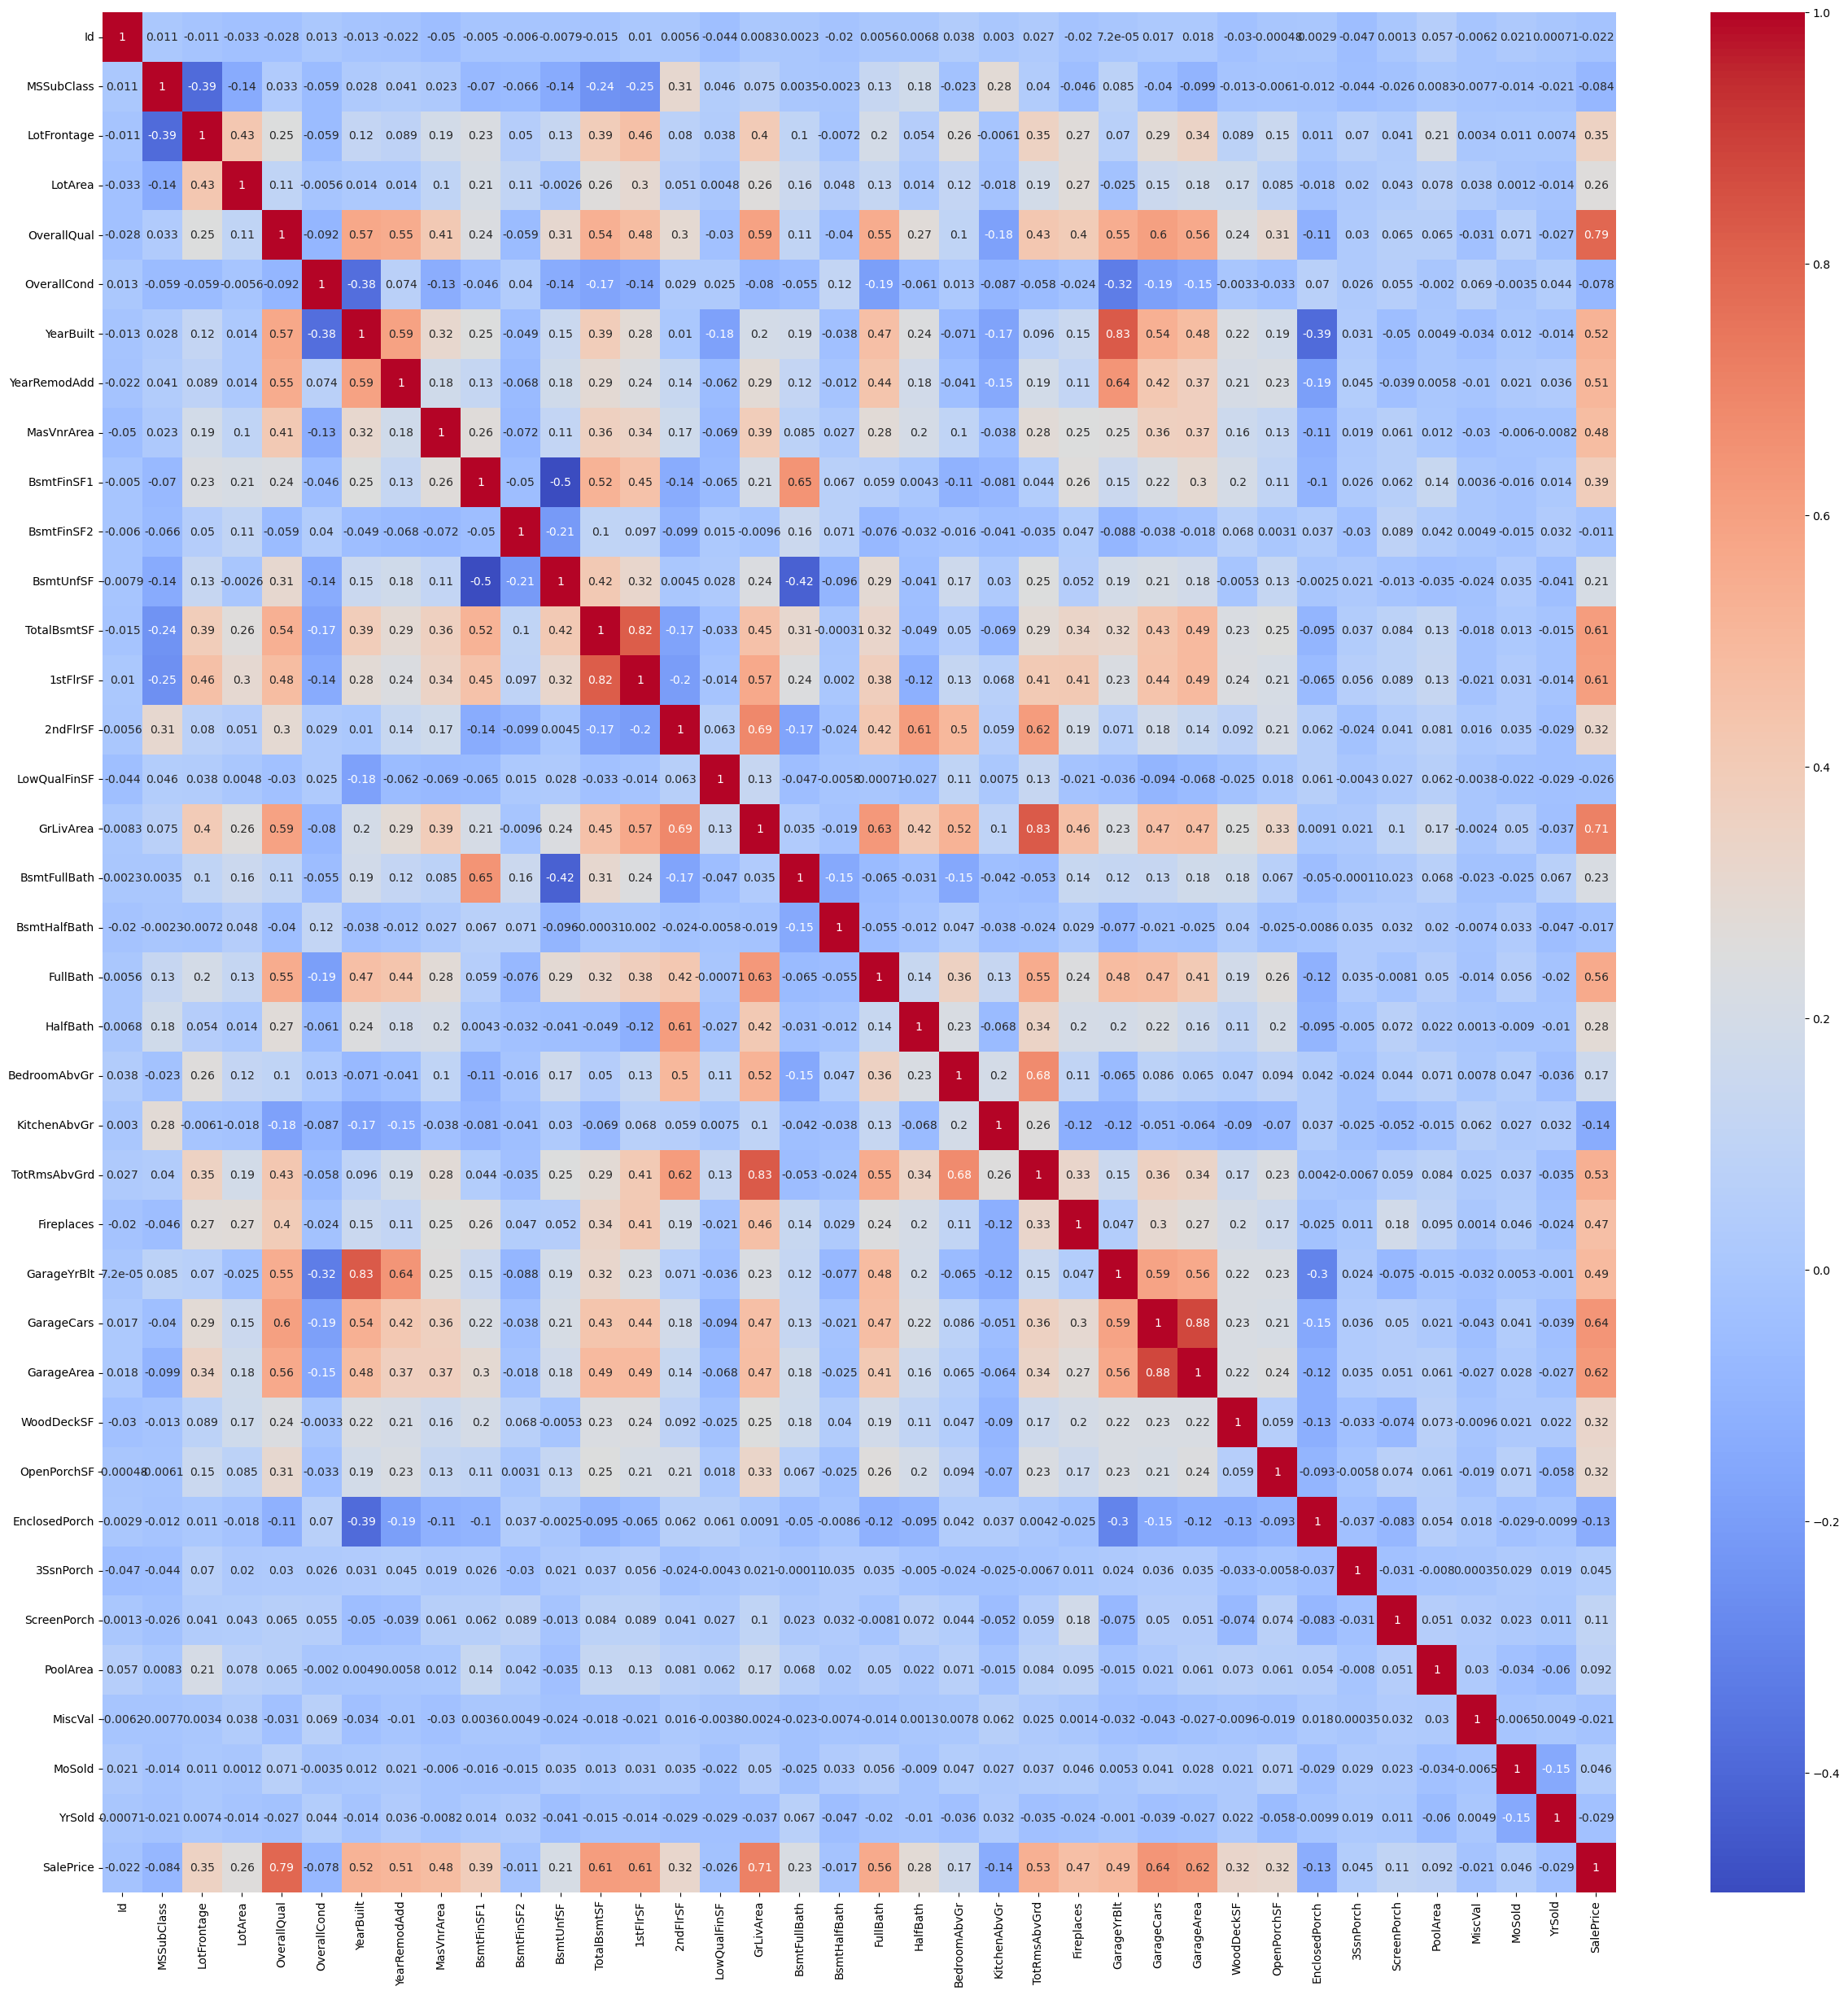

In [52]:
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [53]:
train_data.drop(
    [
        "Id",
        "YrSold",
        "Alley",
        "OverallCond",
        "FireplaceQu",
        "PoolQC",
        "Fence",
        "MiscFeature",
    ],
    axis=1,
    inplace=True,
)
test_data.drop(
    [
        "Id",
        "YrSold",
        "Alley",
        "OverallCond",
        "FireplaceQu",
        "PoolQC",
        "Fence",
        "MiscFeature",
    ],
    axis=1,
    inplace=True,
)

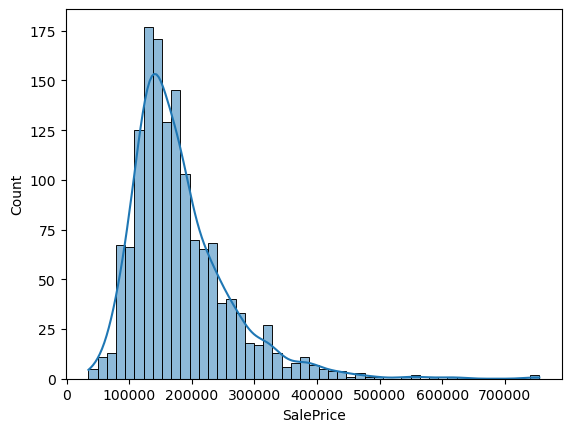

In [54]:
sns.histplot(train_data["SalePrice"], kde=True)
plt.show()

In [55]:
train_data.drop(
    [
        "LotConfig",
        "HalfBath",
        "BsmtFullBath",
        "RoofStyle",
        "HouseStyle",
        "HeatingQC",
        "ExterCond",
        "RoofMatl",
        "Condition1",
        "LandSlope",
        "BldgType",
        "BsmtFinType2",
        "Functional",
        "SaleType",
        "Foundation",
        "BsmtCond",
        "Condition2",
        "PavedDrive",
        "Electrical",
        "Heating",
        "GarageQual",
        "GarageCond",
        "Street",
        "Utilities",
        "BsmtHalfBath",
        "BsmtFinSF2",
        "EnclosedPorch",
        "KitchenAbvGr",
        "3SsnPorch",
        "ScreenPorch",
        "PoolArea",
        "MiscVal",
        "LowQualFinSF",
    ],
    axis=1,
    inplace=True,
)
test_data.drop(
    [
        "LotConfig",
        "HalfBath",
        "BsmtFullBath",
        "RoofStyle",
        "HouseStyle",
        "HeatingQC",
        "ExterCond",
        "RoofMatl",
        "Condition1",
        "LandSlope",
        "BldgType",
        "BsmtFinType2",
        "Functional",
        "SaleType",
        "Foundation",
        "BsmtCond",
        "Condition2",
        "PavedDrive",
        "Electrical",
        "Heating",
        "GarageQual",
        "GarageCond",
        "Street",
        "Utilities",
        "BsmtHalfBath",
        "BsmtFinSF2",
        "EnclosedPorch",
        "KitchenAbvGr",
        "3SsnPorch",
        "ScreenPorch",
        "PoolArea",
        "MiscVal",
        "LowQualFinSF",
    ],
    axis=1,
    inplace=True,
)

In [56]:
train_data.shape

(1460, 40)

In [57]:
import pandas as pd
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

# Identify numeric and categorical columns
numeric_cols = train_data.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = train_data.select_dtypes(include=["object"]).columns.tolist()

# Impute missing values in train data
train_data[numeric_cols] = num_imputer.fit_transform(train_data[numeric_cols])
train_data[categorical_cols] = cat_imputer.fit_transform(train_data[categorical_cols])

In [58]:
# Create imputers
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

# Identify numeric and categorical columns
numeric_cols_test = test_data.select_dtypes(
    include=["int64", "float64"]
).columns.tolist()
categorical_cols_test = test_data.select_dtypes(include=["object"]).columns.tolist()

# Impute missing values in test data
test_data[numeric_cols_test] = num_imputer.fit_transform(test_data[numeric_cols_test])
test_data[categorical_cols_test] = cat_imputer.fit_transform(
    test_data[categorical_cols_test]
)

In [59]:
def detect_outliers(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound


def check_outlier(df, col_name):
    low_limit, up_limit = detect_outliers(df, col_name)
    if df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


numeric_cols = train_data.select_dtypes(include=["int64", "float64"]).columns.tolist()
for col in numeric_cols:
    print(col, check_outlier(train_data, col))

MSSubClass True
LotFrontage True
LotArea True
OverallQual True
YearBuilt True
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtUnfSF True
TotalBsmtSF True
1stFlrSF True
2ndFlrSF True
GrLivArea True
FullBath False
BedroomAbvGr True
TotRmsAbvGrd True
Fireplaces True
GarageYrBlt True
GarageCars True
GarageArea True
WoodDeckSF True
OpenPorchSF True
MoSold False
SalePrice True


In [60]:
def replace_with_thresholds(df, variable):
    low_limit, up_limit = detect_outliers(df, variable)
    df.loc[(df[variable] < low_limit), variable] = low_limit
    df.loc[(df[variable] > up_limit), variable] = up_limit


for col in numeric_cols:
    if col != "SalePrice":
        replace_with_thresholds(train_data, col)

In [61]:
for col in numeric_cols:
    if col != "SalePrice":
        replace_with_thresholds(test_data, col)

In [62]:
for col in numeric_cols:
    print(col, check_outlier(train_data, col))

MSSubClass False
LotFrontage False
LotArea False
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
GrLivArea False
FullBath False
BedroomAbvGr False
TotRmsAbvGrd False
Fireplaces False
GarageYrBlt False
GarageCars False
GarageArea False
WoodDeckSF False
OpenPorchSF False
MoSold False
SalePrice True


In [63]:
for col in numeric_cols:
    if col != "SalePrice":
        print(col, check_outlier(test_data, col))

MSSubClass False
LotFrontage False
LotArea False
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
GrLivArea False
FullBath False
BedroomAbvGr False
TotRmsAbvGrd False
Fireplaces False
GarageYrBlt False
GarageCars False
GarageArea False
WoodDeckSF False
OpenPorchSF False
MoSold False


In [64]:
obj_columens = train_data.select_dtypes(include="object").columns
ordinal_encoder = OrdinalEncoder()
train_data[obj_columens] = ordinal_encoder.fit_transform(train_data[obj_columens])

In [65]:
obj_columens = test_data.select_dtypes(include="object").columns
ordinal_encoder = OrdinalEncoder()
test_data[obj_columens] = ordinal_encoder.fit_transform(test_data[obj_columens])

In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   LotShape       1460 non-null   float64
 5   LandContour    1460 non-null   float64
 6   Neighborhood   1460 non-null   float64
 7   OverallQual    1460 non-null   float64
 8   YearBuilt      1460 non-null   float64
 9   YearRemodAdd   1460 non-null   float64
 10  Exterior1st    1460 non-null   float64
 11  Exterior2nd    1460 non-null   float64
 12  MasVnrType     1460 non-null   float64
 13  MasVnrArea     1460 non-null   float64
 14  ExterQual      1460 non-null   float64
 15  BsmtQual       1460 non-null   float64
 16  BsmtExposure   1460 non-null   float64
 17  BsmtFinType1   1460 non-null   float64
 18  BsmtFinS

In [67]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   MSZoning       1459 non-null   float64
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   float64
 4   LotShape       1459 non-null   float64
 5   LandContour    1459 non-null   float64
 6   Neighborhood   1459 non-null   float64
 7   OverallQual    1459 non-null   float64
 8   YearBuilt      1459 non-null   float64
 9   YearRemodAdd   1459 non-null   float64
 10  Exterior1st    1459 non-null   float64
 11  Exterior2nd    1459 non-null   float64
 12  MasVnrType     1459 non-null   float64
 13  MasVnrArea     1459 non-null   float64
 14  ExterQual      1459 non-null   float64
 15  BsmtQual       1459 non-null   float64
 16  BsmtExposure   1459 non-null   float64
 17  BsmtFinType1   1459 non-null   float64
 18  BsmtFinS

In [68]:
x = train_data.drop(["SalePrice"], axis=1)
y = train_data["SalePrice"]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.80, random_state=20
)

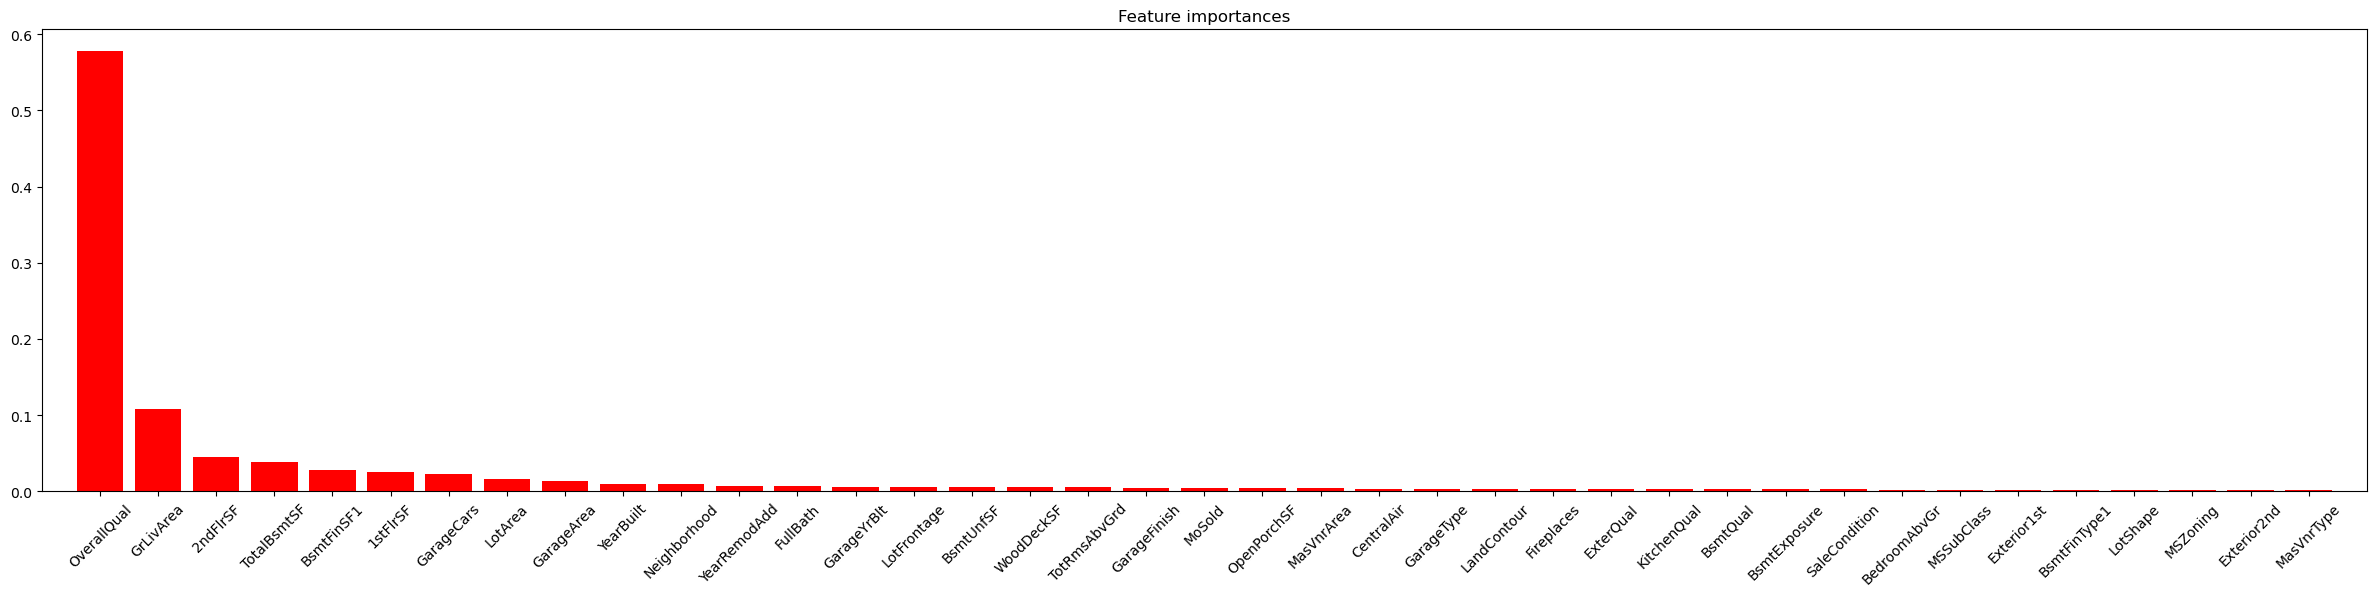

In [69]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your data prepared as X and y
model = RandomForestRegressor()
model.fit(x, y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = (
    train_data.keys()
)  # Assuming train_data is a dictionary with feature names

plt.figure(figsize=(30, 6))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(x.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, x.shape[1]])
plt.show()

In [70]:
# plt.figure(figsize=(30,30))
# sns.histplot(train_data, kde=True)
# plt.show()

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

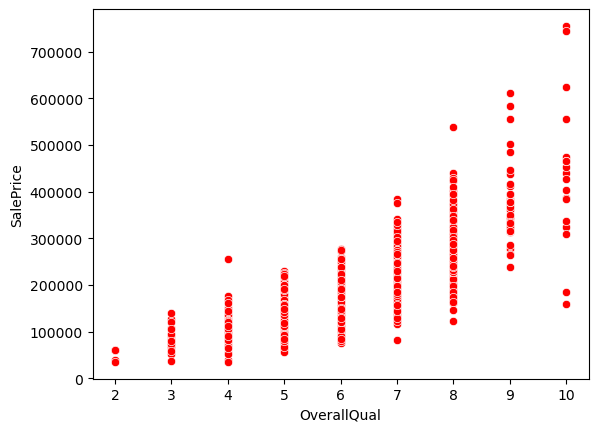

In [71]:
sns.scatterplot(x="OverallQual", y="SalePrice", data=train_data, color="red")

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'MSZoning'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'LotShape'}>,
        <Axes: title={'center': 'LandContour'}>],
       [<Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'Exterior1st'}>,
        <Axes: title={'center': 'Exterior2nd'}>],
       [<Axes: title={'center': 'MasVnrType'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'ExterQual'}>,
        <Axes: title={'center': 'BsmtQual'}>,
        <Axes: title={'center': 'BsmtExposure'}>,
        <Axes: title={'center': 'BsmtFinType1'}>],
       [<Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'Tot

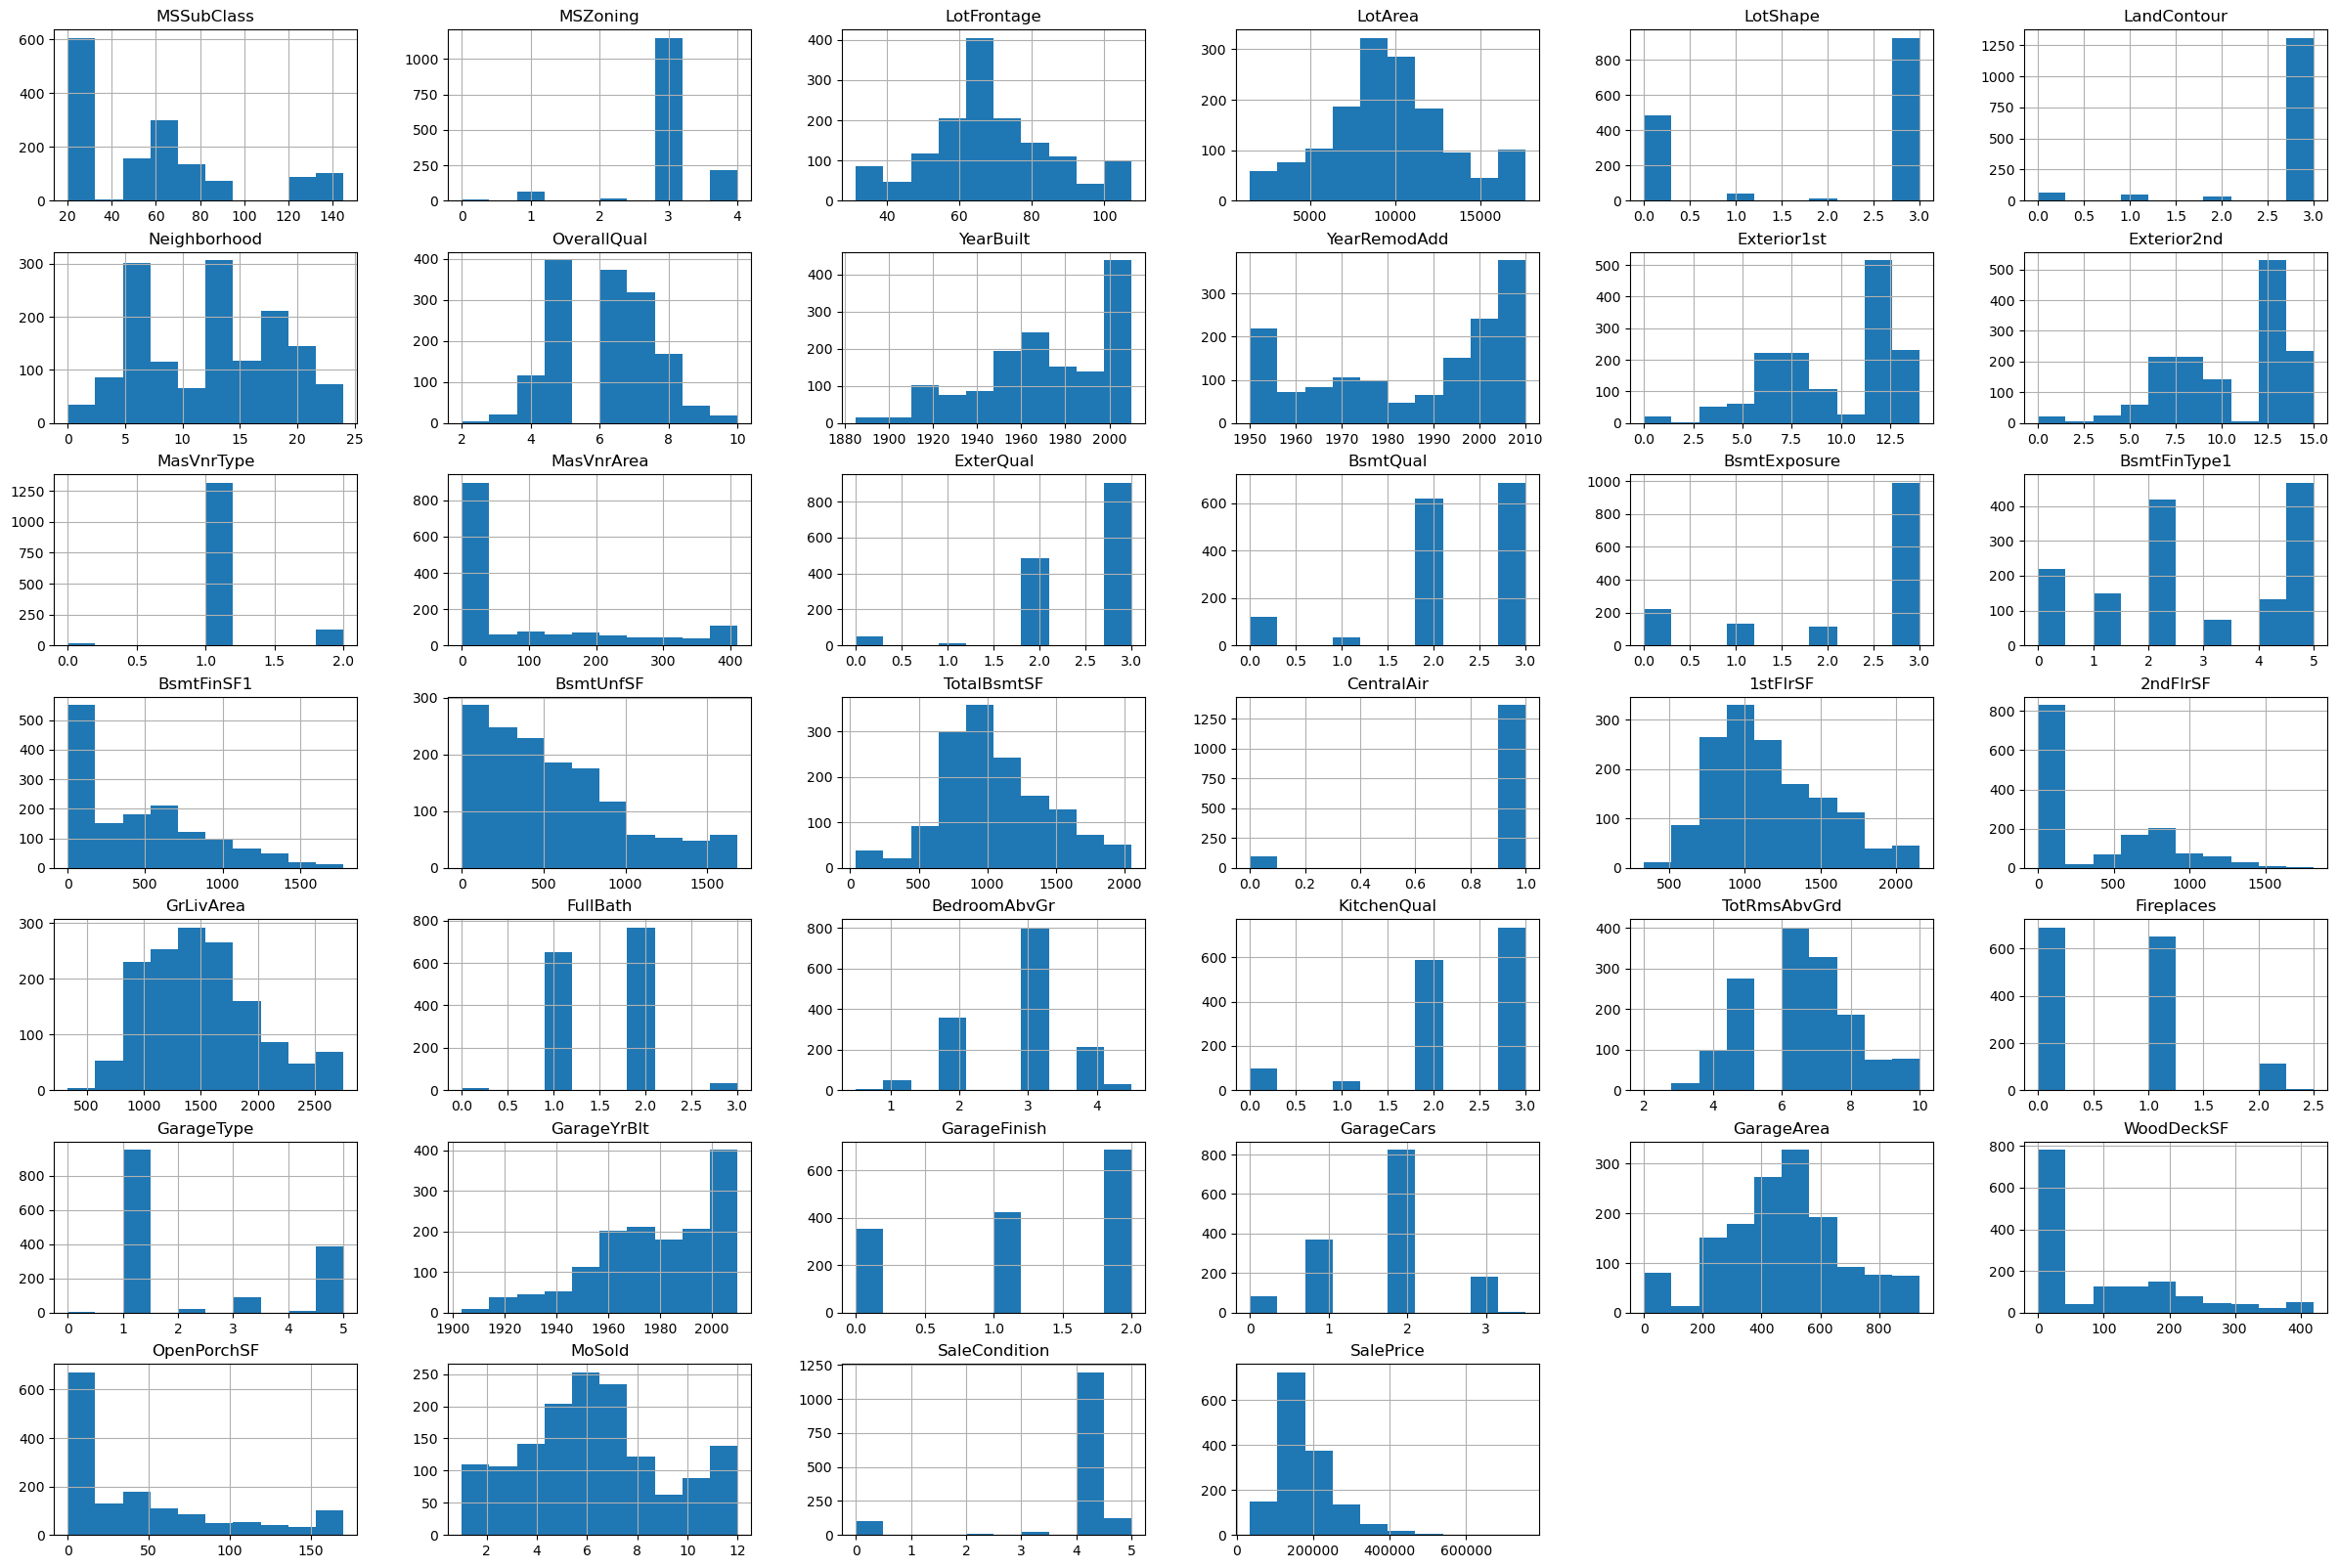

In [72]:
train_data.hist(figsize=(30, 20))

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'MSZoning'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'LotShape'}>,
        <Axes: title={'center': 'LandContour'}>],
       [<Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'Exterior1st'}>,
        <Axes: title={'center': 'Exterior2nd'}>],
       [<Axes: title={'center': 'MasVnrType'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'ExterQual'}>,
        <Axes: title={'center': 'BsmtQual'}>,
        <Axes: title={'center': 'BsmtExposure'}>,
        <Axes: title={'center': 'BsmtFinType1'}>],
       [<Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'Tot

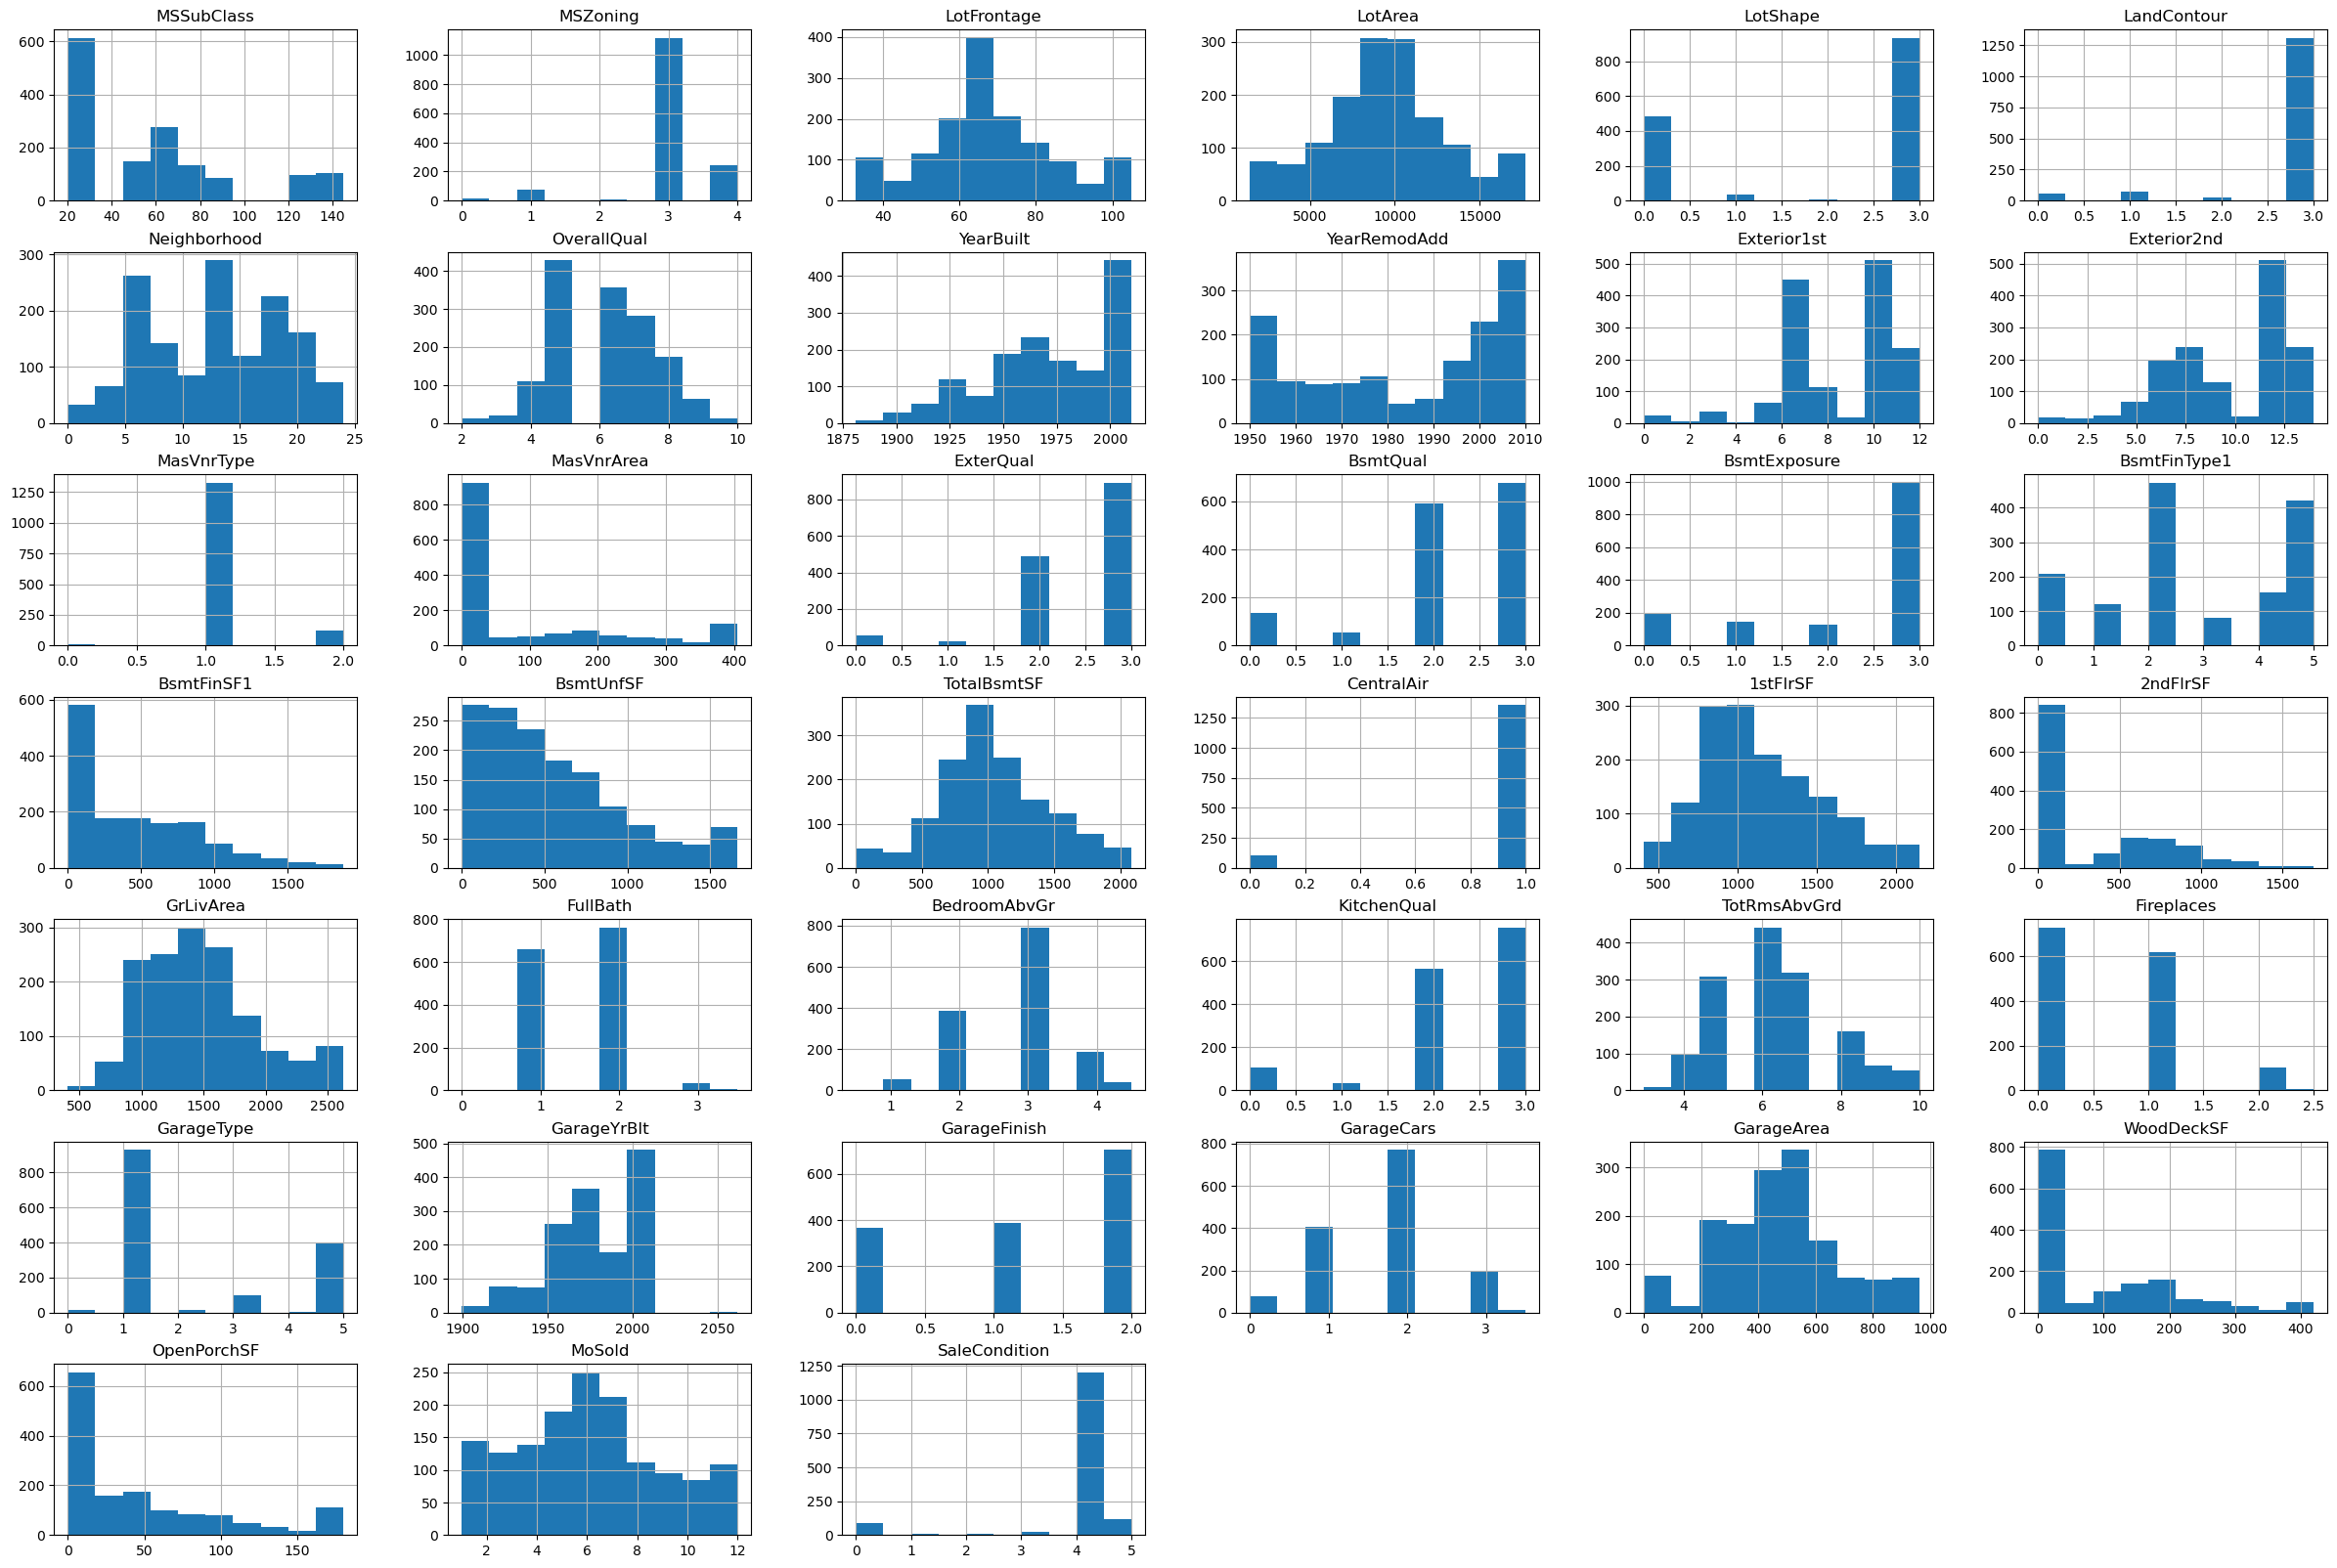

In [73]:
test_data.hist(figsize=(30, 20))

#Linear Regression


In [74]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [75]:
y_pred = linear_reg.predict(x_test)

In [76]:
mse = mean_squared_error(y_test, y_pred)
msa = mean_absolute_error(y_test, y_pred)
rsq = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rsq = r2_score(y_test, y_pred)
print(f"mse : {mse}")
print(f"mae : {mae}")
print(f"rsq : {rsq}")

mse : 1112856359.2115233
mae : 19404.352013271047
rsq : 0.8376802706626096


#Lasso


In [77]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)


param_grid = {"alpha": [0.1, 0.001, 0.0001, 1, 100, 1000]}

lasso_cv = GridSearchCV(lasso_model, param_grid, cv=3, n_jobs=-1)

lasso_cv.fit(x_train, y_train)
lasso_cv.best_estimator_

Lasso(alpha=100)

In [78]:
lasso_model = Lasso(0.0001)
lasso_model.fit(x_train, y_train)
y_pred_Lasso = lasso_model.predict(x_test)

In [79]:
mse_lasso = mean_squared_error(y_test, y_pred_Lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_Lasso)
Lasso_r2 = r2_score(y_test, y_pred_Lasso)
print(f"mse: {mse_lasso}")
print(f"mae: {mae_lasso}")
print(f"r2: {Lasso_r2}")

mse: 1112856359.3172023
mae: 19404.35204951708
r2: 0.8376802706471954


#Ridge


In [80]:
Ridge_model = Ridge()
Ridge_model.fit(x_train, y_train)
param_grid = {"alpha": [0.1, 0.001, 0.0001, 1, 100, 1000]}
Ridge_cv = GridSearchCV(Ridge_model, param_grid, cv=3, n_jobs=-1)
Ridge_cv.fit(x_train, y_train)
Ridge_cv.best_estimator_

Ridge(alpha=100)

In [81]:
ridge_model = Ridge(1)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)

In [82]:
mse_ridge = mean_squared_error(y_test, y_pred_Lasso)
mae_ridge = mean_absolute_error(y_test, y_pred_Lasso)
ridge_r2 = r2_score(y_test, y_pred_ridge)
print(f"mse: {mse_ridge}")
print(f"mae: {mae_ridge}")
print(f"r2: {ridge_r2}")

mse: 1112856359.3172023
mae: 19404.35204951708
r2: 0.8376592207371956
